# Data load

In [2]:
%pwd

'/Users/sophijka/Experiments/covidexplore/analysis'

In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# Load data from 2019
data_2020 = pd.read_csv("../data/aqi_df.csv")

# Load data from 2020
data_2019 = pd.read_csv("../data/country_df.csv")

In [5]:
# update week number for 2019
data_2019['week'] = data_2019['week'] + 4
data_2019

,country,week,NO2,PM2.5
0,Argentina,5,4.150000,52.733333
1,Argentina,6,7.196429,48.091270
2,Argentina,7,7.333333,40.583333
3,Argentina,8,6.412698,58.047619
4,Argentina,9,4.119048,34.080159
...,...,...,...,...
644,Uzbekistan,11,NaN,68.571429
645,Uzbekistan,12,NaN,87.142857
646,Uzbekistan,13,NaN,62.428571
647,Uzbekistan,14,NaN,66.285714


In [6]:
data_2020

,country,week,NO2,PM2.5
0,Argentina,1,2.875000,19.041667
1,Argentina,2,4.750000,31.178571
2,Argentina,3,6.671429,27.500000
3,Argentina,4,4.833333,23.750000
4,Argentina,5,4.357143,26.083333
...,...,...,...,...
905,Uzbekistan,10,NaN,100.857143
906,Uzbekistan,11,NaN,135.428571
907,Uzbekistan,12,NaN,99.428571
908,Uzbekistan,13,NaN,114.857143


In [7]:
data_2019.dropna()


,country,week,NO2,PM2.5
0,Argentina,5,4.150000,52.733333
1,Argentina,6,7.196429,48.091270
2,Argentina,7,7.333333,40.583333
3,Argentina,8,6.412698,58.047619
4,Argentina,9,4.119048,34.080159
...,...,...,...,...
523,Vietnam,11,21.285714,100.750000
524,Vietnam,12,22.000000,81.528571
525,Vietnam,13,24.000000,93.678571
526,Vietnam,14,21.000000,69.964286


In [8]:
data_2020.dropna()


,country,week,NO2,PM2.5
0,Argentina,1,2.875000,19.041667
1,Argentina,2,4.750000,31.178571
2,Argentina,3,6.671429,27.500000
3,Argentina,4,4.833333,23.750000
4,Argentina,5,4.357143,26.083333
...,...,...,...,...
653,Vietnam,10,12.873016,71.323810
654,Vietnam,11,12.682540,84.107937
655,Vietnam,12,9.166667,75.912698
656,Vietnam,13,7.857143,69.174603


# Differencing data

In [9]:
merged_df = pd.merge(left=data_2020, right=data_2019, left_on=['country', 'week'], right_on=['country', 'week'])

In [10]:
merged_df['PM2.5_diff'] = merged_df['PM2.5_x'] - merged_df['PM2.5_y']
merged_df['NO2_diff'] = merged_df['NO2_x'] - merged_df['NO2_y']
merged_df.rename(columns={"NO2_x": "NO2_2020", "PM2.5_x": "PM2.5_2020", "NO2_y": "NO2_2019", "PM2.5_y": "PM2.5_2019"}, errors="raise")
merged_df

,country,week,NO2_x,PM2.5_x,NO2_y,PM2.5_y,PM2.5_diff,NO2_diff
0,Argentina,5,4.357143,26.083333,4.150000,52.733333,-26.650000,0.207143
1,Argentina,6,3.910714,18.857143,7.196429,48.091270,-29.234127,-3.285714
2,Argentina,7,6.714286,21.291667,7.333333,40.583333,-19.291667,-0.619048
3,Argentina,8,5.571429,34.714286,6.412698,58.047619,-23.333333,-0.841270
4,Argentina,9,4.958333,37.982143,4.119048,34.080159,3.901984,0.839286
...,...,...,...,...,...,...,...,...
575,Uzbekistan,10,NaN,100.857143,NaN,114.142857,-13.285714,NaN
576,Uzbekistan,11,NaN,135.428571,NaN,68.571429,66.857143,NaN
577,Uzbekistan,12,NaN,99.428571,NaN,87.142857,12.285714,NaN
578,Uzbekistan,13,NaN,114.857143,NaN,62.428571,52.428571,NaN


In [11]:
merged_df.reset_index()

,index,country,week,NO2_x,PM2.5_x,NO2_y,PM2.5_y,PM2.5_diff,NO2_diff
0,0,Argentina,5,4.357143,26.083333,4.150000,52.733333,-26.650000,0.207143
1,1,Argentina,6,3.910714,18.857143,7.196429,48.091270,-29.234127,-3.285714
2,2,Argentina,7,6.714286,21.291667,7.333333,40.583333,-19.291667,-0.619048
3,3,Argentina,8,5.571429,34.714286,6.412698,58.047619,-23.333333,-0.841270
4,4,Argentina,9,4.958333,37.982143,4.119048,34.080159,3.901984,0.839286
...,...,...,...,...,...,...,...,...,...
575,575,Uzbekistan,10,NaN,100.857143,NaN,114.142857,-13.285714,NaN
576,576,Uzbekistan,11,NaN,135.428571,NaN,68.571429,66.857143,NaN
577,577,Uzbekistan,12,NaN,99.428571,NaN,87.142857,12.285714,NaN
578,578,Uzbekistan,13,NaN,114.857143,NaN,62.428571,52.428571,NaN


In [12]:
merged_df.to_csv("../data/2020_2019_difference.csv")

In [13]:
# adding year columns for visualisation
data_2019['year'] = 2019
data_2020['year'] = 2020

In [38]:
#a = np.array(5:14)
#a
np.arange(5, 15)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [41]:
df_overall = pd.concat([data_2019, data_2020], axis=0)
ar = np.arange(5, 15) # weeks for which we have data in both dfs
df_overall = df_overall.loc[df_overall['week'].isin(ar)]
df_overall

,country,week,NO2,PM2.5,year
0,Argentina,5,4.150000,52.733333,2019
1,Argentina,6,7.196429,48.091270,2019
2,Argentina,7,7.333333,40.583333,2019
3,Argentina,8,6.412698,58.047619,2019
4,Argentina,9,4.119048,34.080159,2019
...,...,...,...,...,...
905,Uzbekistan,10,NaN,100.857143,2020
906,Uzbekistan,11,NaN,135.428571,2020
907,Uzbekistan,12,NaN,99.428571,2020
908,Uzbekistan,13,NaN,114.857143,2020


In [59]:
df_overall

,country,week,NO2,PM2.5,year
0,Argentina,5,4.150000,52.733333,2019
1,Argentina,6,7.196429,48.091270,2019
2,Argentina,7,7.333333,40.583333,2019
3,Argentina,8,6.412698,58.047619,2019
4,Argentina,9,4.119048,34.080159,2019
...,...,...,...,...,...
905,Uzbekistan,10,NaN,100.857143,2020
906,Uzbekistan,11,NaN,135.428571,2020
907,Uzbekistan,12,NaN,99.428571,2020
908,Uzbekistan,13,NaN,114.857143,2020


In [60]:
df_overall['date'] = pd.to_datetime((df_overall['year'].astype(str) + df_overall['week'].astype(str)).astype(str) + '0', format='%Y%W%w')
df_overall  

,country,week,NO2,PM2.5,year,date
0,Argentina,5,4.150000,52.733333,2019,2019-02-10
1,Argentina,6,7.196429,48.091270,2019,2019-02-17
2,Argentina,7,7.333333,40.583333,2019,2019-02-24
3,Argentina,8,6.412698,58.047619,2019,2019-03-03
4,Argentina,9,4.119048,34.080159,2019,2019-03-10
...,...,...,...,...,...,...
905,Uzbekistan,10,NaN,100.857143,2020,2020-03-15
906,Uzbekistan,11,NaN,135.428571,2020,2020-03-22
907,Uzbekistan,12,NaN,99.428571,2020,2020-03-29
908,Uzbekistan,13,NaN,114.857143,2020,2020-04-05


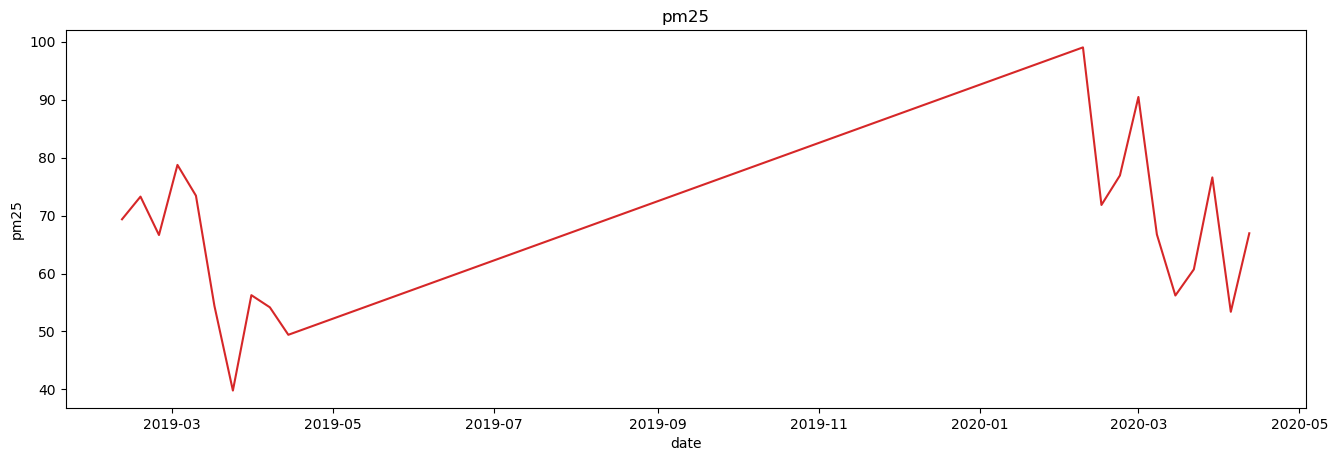

In [62]:
# This is not a smart visualisation as we miss most weeks in 2019

def plot_df(df, x, y, title="", xlabel='date', ylabel='pm25', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
def plot_per_country(country):
    df_country = df_overall.loc[df_overall.country==country, :]
    plot_df(df_country, x=df_country['date'], y=df_country['PM2.5'], title='pm25')

plot_per_country('Italy')

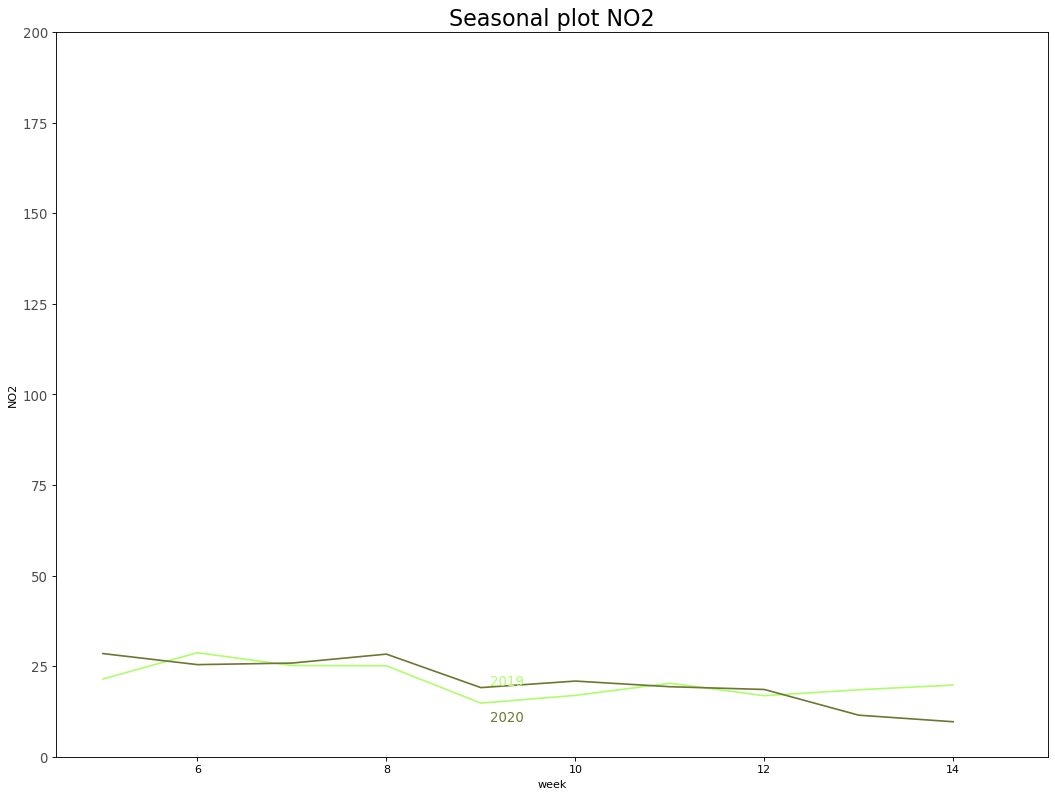

In [85]:

# Aligning time series, more meaningful visualisation

def plot_df_aligned(df, x, y, title="", xlabel='week', ylabel='PM2.5', dpi=100):
    np.random.seed(100)
    years = df['year'].unique()
    colrs = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=True)

    plt.figure(figsize=(16,12), dpi= 80)
    for i, y in enumerate(years):
        if i >= 0: 
            plt.plot(xlabel, ylabel, data=df.loc[df.year==y, :], color=colrs[i], label=y)
            plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, ylabel][-1:].values[0], y, fontsize=12, color=colrs[i])

    plt.gca().set(xlim=(4.5, 15), ylim=(0, 200), ylabel=ylabel, xlabel=xlabel)
    plt.yticks(fontsize=12, alpha=.7)
    plt.title("Seasonal plot " + ylabel, fontsize=20)

def plot_per_country_aligned(country, measure):
    df_country = df_overall.loc[df_overall.country==country, :]
    plot_df_aligned(df_country, x=df_country['week'], y=df_country[[measure]], ylabel=measure)

plot_per_country_aligned('Italy', 'NO2')




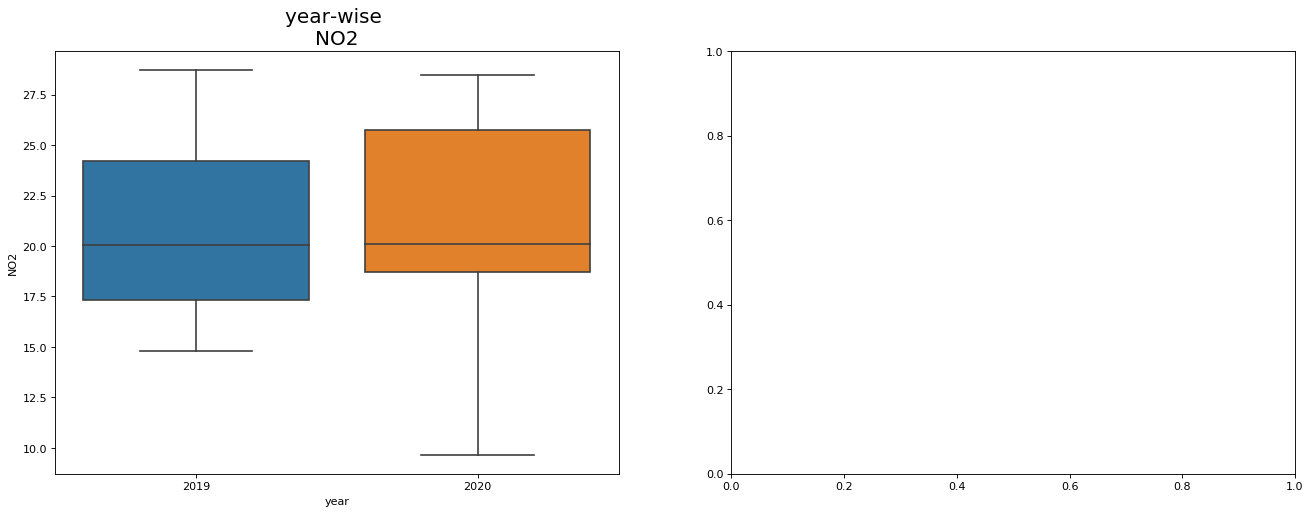

In [95]:

# Aligning time series, more meaningful visualisation

def plot_df_boxplot(df, x, y, title="", xlabel='year', ylabel='PM2.5', dpi=100):
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
    sns.boxplot(x='year', y=ylabel, data=df, ax=axes[0])
    axes[0].set_title('year-wise \n' + ylabel, fontsize=18)
    plt.show()

def plot_per_country_boxplot(country, measure):
    df_country = df_overall.loc[df_overall.country==country, :]
    plot_df_boxplot(df_country, x=df_country['year'], y=df_country[[measure]], ylabel=measure)

plot_per_country_boxplot('Italy', 'NO2')


